In [2]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

In [9]:
# Load the model
model = ResNet50(weights='imagenet')



# Load and resize the image
img_path = 'elephant.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array and preprocess
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = preprocess_input(x)        # Normalize based on ResNet50 requirements

In [10]:
# Predict
predictions = model.predict(x)

# Decode the top 3 predictions
decoded = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, confidence) in enumerate(decoded):
    print(f"{i+1}: {label} ({confidence*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
1: Indian_elephant (81.99%)
2: African_elephant (11.78%)
3: tusker (5.83%)


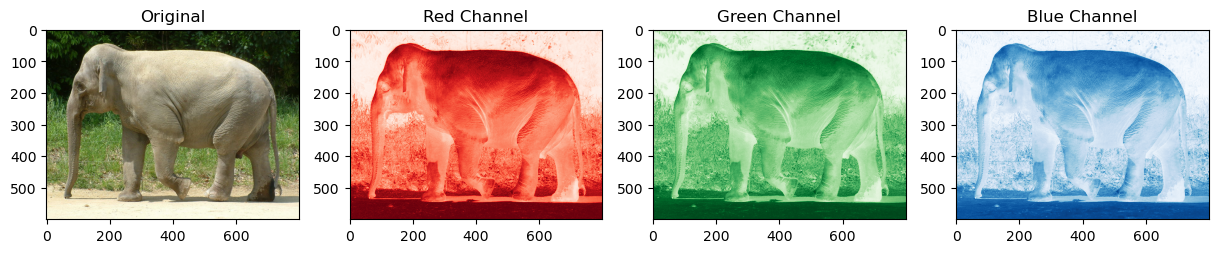

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load image using OpenCV
img = cv2.imread('elephant.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(img_rgb)

# Plot the channels
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_rgb)
ax[0].set_title("Original")
ax[1].imshow(r, cmap='Reds')
ax[1].set_title("Red Channel")
ax[2].imshow(g, cmap='Greens')
ax[2].set_title("Green Channel")
ax[3].imshow(b, cmap='Blues')
ax[3].set_title("Blue Channel")
plt.show()

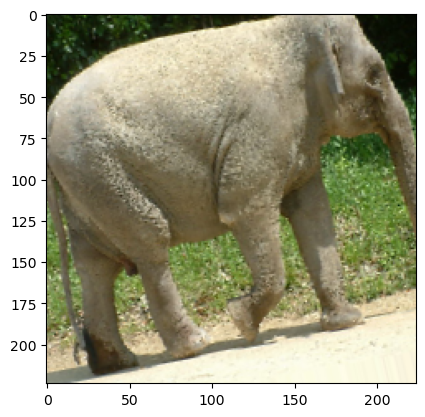

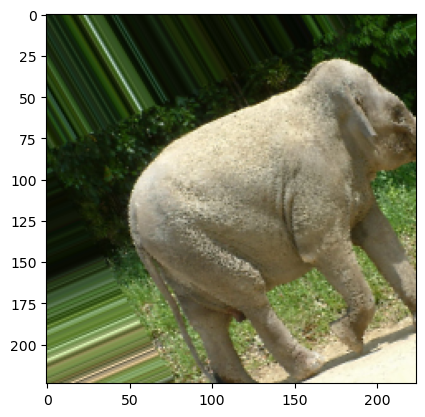

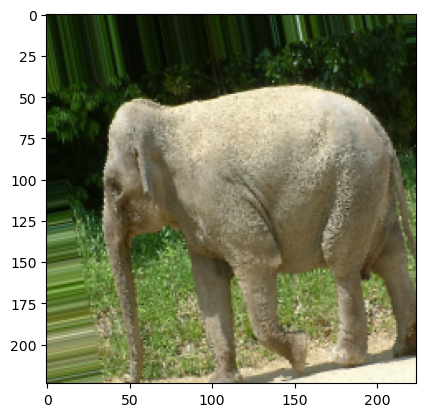

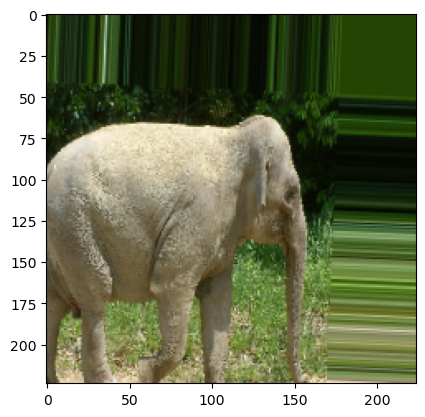

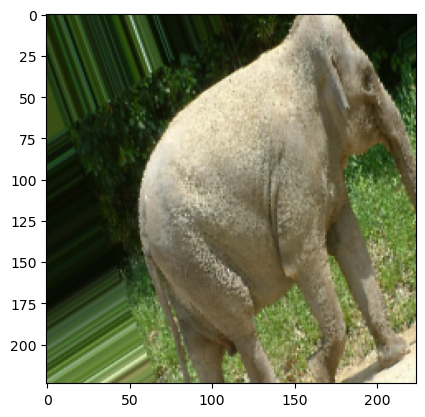

In [18]:
import matplotlib.pyplot as plt
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

# Load and preprocess image
img = load_img("elephant.jpg", target_size=(224, 224))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshape for batch dimension

# Set up the augmentation generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(batch[0] / 255.0)  # Normalize for display
    i += 1
    if i > 4:
        break
plt.show()

### With vs Without Batch Norm

In [20]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 507s 3us/step


In [21]:
def create_model_without_bn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


def create_model_with_bn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [22]:
model_no_bn = create_model_without_bn()
model_with_bn = create_model_with_bn()

for model, name in [(model_no_bn, "No BatchNorm"), (model_with_bn, "With BatchNorm")]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    print(f"\nTraining {name}")
    model.fit(x_train, y_train,
              epochs=10,
              batch_size=64,
              validation_data=(x_test, y_test),
              verbose=2)

/opt/anaconda3/envs/cnn/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training No BatchNorm
Epoch 1/10
782/782 - 12s - 15ms/step - accuracy: 0.4509 - loss: 1.5260 - val_accuracy: 0.5461 - val_loss: 1.2749
Epoch 2/10
782/782 - 11s - 14ms/step - accuracy: 0.5800 - loss: 1.1900 - val_accuracy: 0.6166 - val_loss: 1.1114
Epoch 3/10
782/782 - 11s - 15ms/step - accuracy: 0.6322 - loss: 1.0549 - val_accuracy: 0.6416 - val_loss: 1.0338
Epoch 4/10
782/782 - 11s - 14ms/step - accuracy: 0.6636 - loss: 0.9677 - val_accuracy: 0.6611 - val_loss: 0.9811
Epoch 5/10
782/782 - 11s - 14ms/step - accuracy: 0.6878 - loss: 0.9011 - val_accuracy: 0.6566 - val_loss: 1.0024
Epoch 6/10
782/782 - 11s - 15ms/step - accuracy: 0.7105 - loss: 0.8437 - val_accuracy: 0.6816 - val_loss: 0.9368
Epoch 7/10
782/782 - 12s - 15ms/step - accuracy: 0.7252 - loss: 0.7956 - val_accuracy: 0.6913 - val_loss: 0.9214
Epoch 8/10
782/782 - 12s - 15ms/step - accuracy: 0.7432 - loss: 0.7465 - val_accuracy: 0.6852 - val_loss: 0.9450
Epoch 9/10
782/782 - 12s - 15ms/step - accuracy: 0.7528 - loss: 0.7176 - 

In [ ]:
model_no_bn

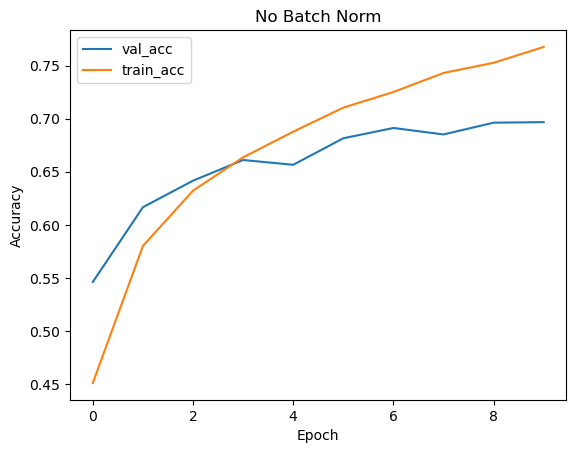

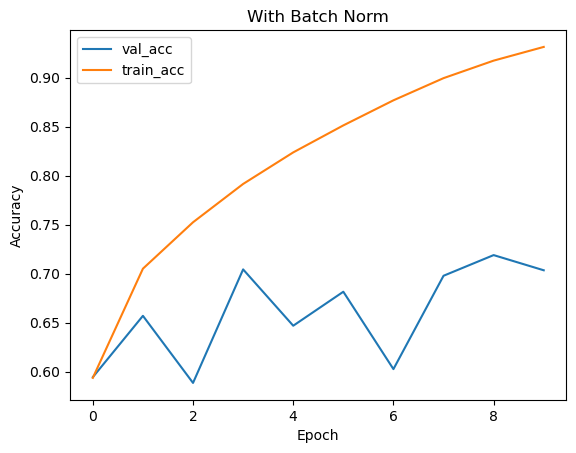

In [25]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
plot_history(model_no_bn.history,'No Batch Norm')
plot_history(model_with_bn.history,'With Batch Norm')

### End to End Example with CIFAR-10

In [26]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load CIFAR-10 (32x32 RGB images in 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [50]:
from keras import layers, models, Input

inputs = Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3,3), padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), padding='same', name="target_conv_layer")(x)  # Named for Grad-CAM
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [52]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [53]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=2
)

Epoch 1/10
704/704 - 23s - 33ms/step - accuracy: 0.5815 - loss: 1.2001 - val_accuracy: 0.5780 - val_loss: 1.1987
Epoch 2/10
704/704 - 23s - 32ms/step - accuracy: 0.6998 - loss: 0.8637 - val_accuracy: 0.5454 - val_loss: 1.3432
Epoch 3/10
704/704 - 22s - 32ms/step - accuracy: 0.7490 - loss: 0.7232 - val_accuracy: 0.6842 - val_loss: 0.8911
Epoch 4/10
704/704 - 23s - 33ms/step - accuracy: 0.7880 - loss: 0.6148 - val_accuracy: 0.6492 - val_loss: 1.0842
Epoch 5/10
704/704 - 24s - 34ms/step - accuracy: 0.8210 - loss: 0.5190 - val_accuracy: 0.6514 - val_loss: 1.0577
Epoch 6/10
704/704 - 24s - 34ms/step - accuracy: 0.8512 - loss: 0.4376 - val_accuracy: 0.6538 - val_loss: 1.0812
Epoch 7/10
704/704 - 24s - 34ms/step - accuracy: 0.8771 - loss: 0.3631 - val_accuracy: 0.6316 - val_loss: 1.1863
Epoch 8/10
704/704 - 24s - 34ms/step - accuracy: 0.8994 - loss: 0.2973 - val_accuracy: 0.6846 - val_loss: 1.0342
Epoch 9/10
704/704 - 24s - 34ms/step - accuracy: 0.9154 - loss: 0.2539 - val_accuracy: 0.6568 - 

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.2f}")

Test accuracy: 0.63


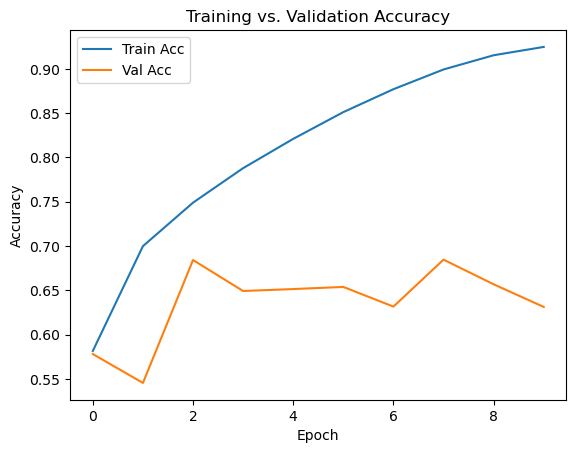

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
import numpy as np

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


### Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


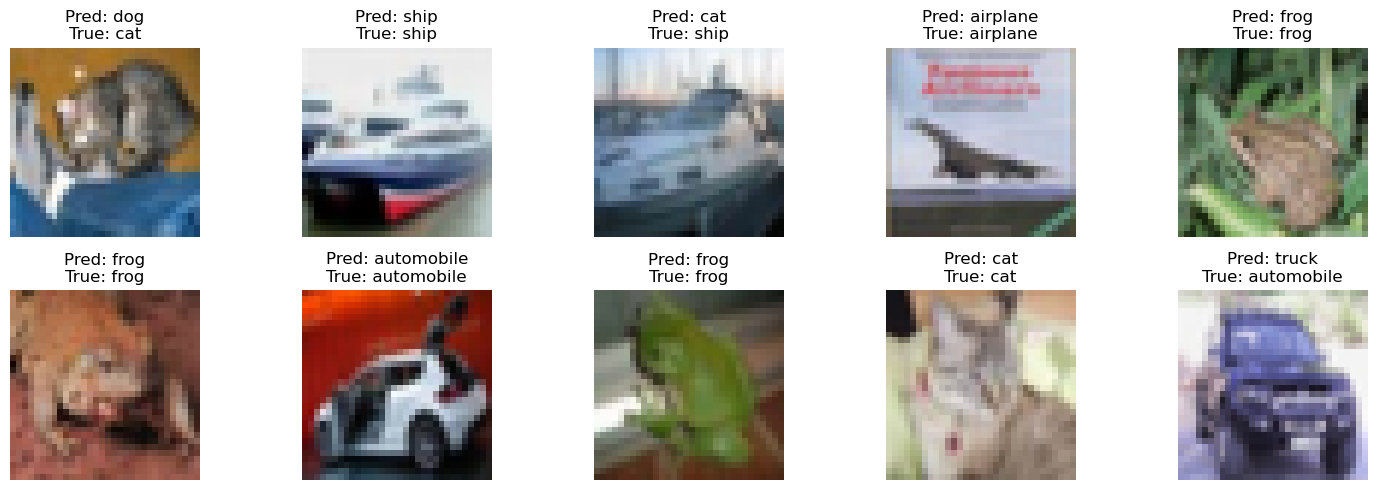

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 10 test images with predictions
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
plt.tight_layout()
plt.show()

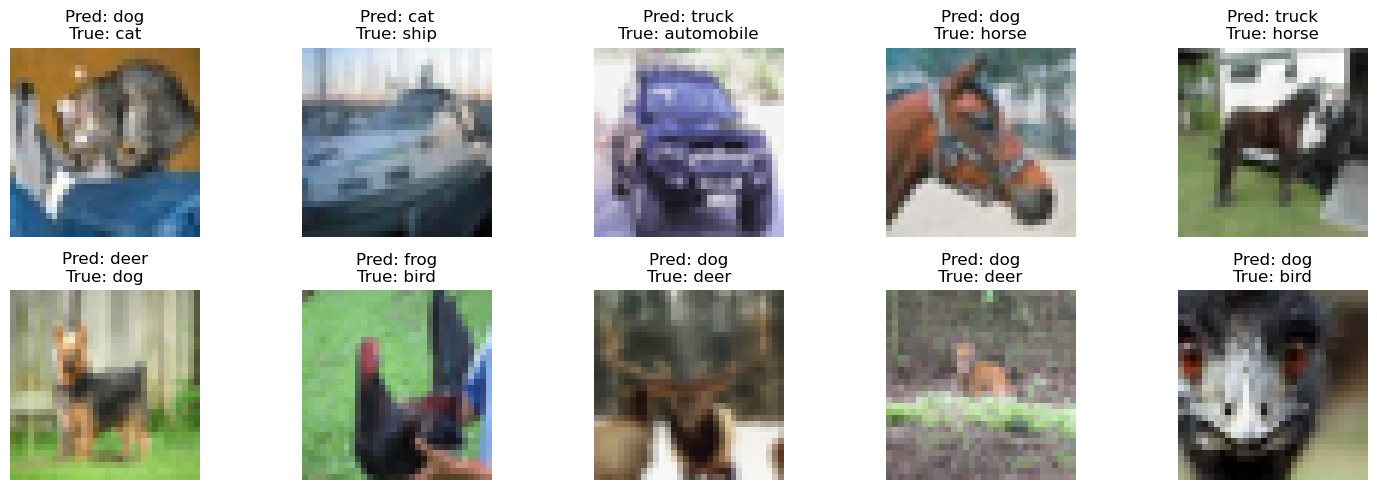

In [61]:
# Indices where predictions are wrong
incorrect = np.where(predicted_classes != true_classes)[0]

# Show a few
plt.figure(figsize=(15,5))
for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.axis('off')
    plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[true_classes[idx]]}")
plt.tight_layout()
plt.show()

In [62]:
def display_gradcam(img, heatmap, alpha=0.4):
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np

    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # Normalize heatmap to 0–255 and convert to color
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert original image to uint8 for overlay (scaled back from 0–1 to 0–255)
    img_uint8 = np.uint8(255 * img)

    # Overlay the heatmap on the original image
    overlay = cv2.addWeighted(img_uint8, 1 - alpha, heatmap_color, alpha, 0)

    # Display
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))  # Convert BGR (OpenCV) to RGB for display
    plt.axis('off')
    plt.title("Grad-CAM Overlay")
    plt.show()

In [63]:
heatmap = make_gradcam_heatmap(
    img_input, 
    model, 
    last_conv_layer_name="target_conv_layer"
)

/opt/anaconda3/envs/cnn/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: [['keras_tensor_398']]. Received: the structure of inputs=*
  warnings.warn(


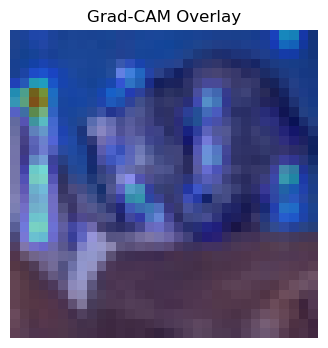

In [64]:
# Pick a test image
img_index = 0
img = x_test[img_index]
img_input = np.expand_dims(img, axis=0)

# Generate Grad-CAM heatmap from your model
heatmap = make_gradcam_heatmap(img_input, model, last_conv_layer_name="target_conv_layer")

# Display overlay
display_gradcam(img, heatmap)